In [12]:
from mnist import load_mnist, label_to_name
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import *
import numpy as np
import os

In [3]:

images, labels = load_mnist('../data/orig', kind='train')


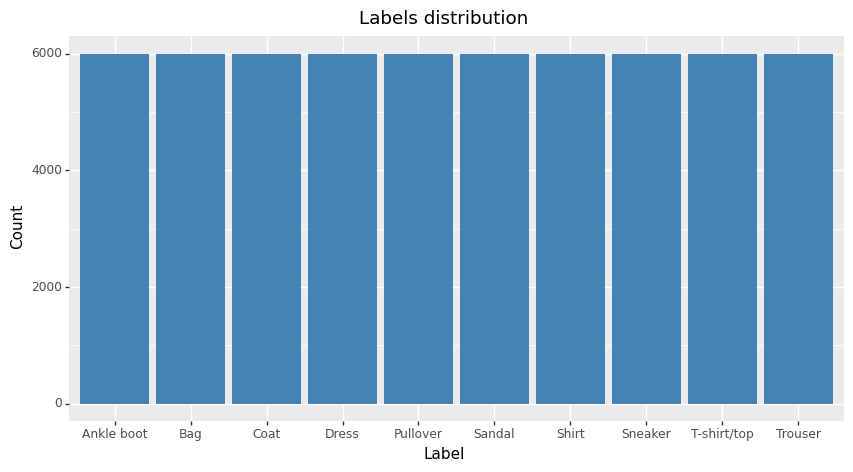

<ggplot: (394058695)>

In [7]:
# plot labels distribution
df = pd.DataFrame({'label': [label_to_name(x) for x in labels],})
(ggplot(df, aes(x='factor(label)')) +
    geom_bar(fill='steelblue') +
    labs(title='Labels distribution', x='Label', y='Count') +
    theme(figure_size=(10, 5)))


In [13]:
# let's remove 80% of examples of the bag class

# get indices of bag examples
bag_indices = [i for i, x in enumerate(labels) if x == 8]
bag_indices = bag_indices[:int(len(bag_indices) * 0.8)]
len(bag_indices)
images_v1 = np.delete(images, bag_indices, axis=0)
labels_v1 = np.delete(labels, bag_indices, axis=0)


os.makedirs('../data/v1', exist_ok=True)
# save to data/v1
np.save('../data/v1/images.npy', images_v1)
np.save('../data/v1/labels.npy', labels_v1)

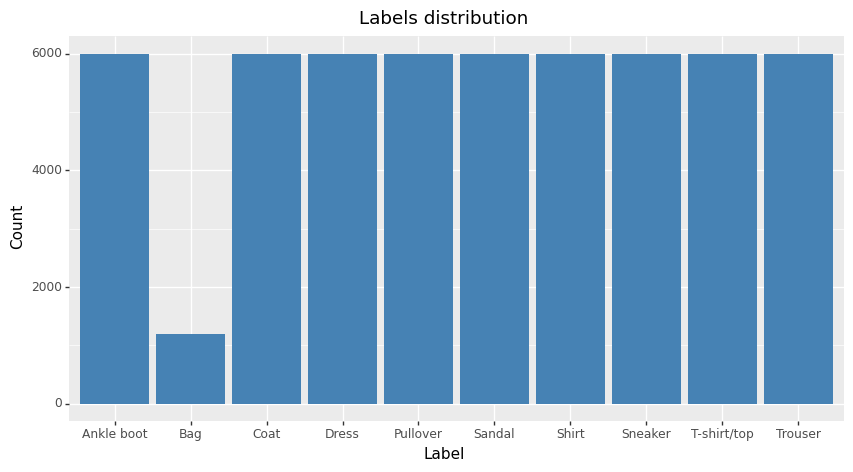

<ggplot: (394083982)>

In [14]:
df = pd.DataFrame({'label': [label_to_name(x) for x in labels_v1],})
(ggplot(df, aes(x='factor(label)')) +
    geom_bar(fill='steelblue') +
    labs(title='Labels distribution', x='Label', y='Count') +
    theme(figure_size=(10, 5)))

In [15]:
# set random labels to 50% of trouser examples
trouser_indices = [i for i, x in enumerate(labels_v1) if x == 1]
trouser_indices = trouser_indices[:int(len(trouser_indices) * 0.5)]
len(trouser_indices)
labels_v2 = labels_v1.copy()
labels_v2[trouser_indices] = np.random.randint(0, 9, len(trouser_indices))
labels_v2[trouser_indices]

os.makedirs('../data/v2', exist_ok=True)
# save to data/v2
np.save('../data/v2/images.npy', images_v1)
np.save('../data/v2/labels.npy', labels_v2)